# Datos de costos médicos

Cargamos los datos

In [1]:
import pandas as pd
ds_path = "data/insurance.csv"
df = pd.read_csv(ds_path)

Exploramos los datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Se observan que los tipos de datos corresponden.

Observamos los valores unicos de las variables categóricas

In [3]:
from utils import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

sex
['female' 'male']
smoker
['yes' 'no']
region
['southwest' 'southeast' 'northwest' 'northeast']


Continuamos con la exploración de los datos

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Visualizamos la cabecera, luego las últimas entradas

In [5]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


Verificamos los valores descriptivos

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Se observan que los valores son adecuados, no existen valores negativos, ni valores imposibles.

En el caso de BMI observamos un valor muy extremo (53), pero aún así es posible que se presente una persona con tal valor

## Identificación de valores nulos y outliers

Ahora valores nulos

In [7]:
from utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
age,1338,0,0.0
sex,1338,0,0.0
bmi,1338,0,0.0
children,1338,0,0.0
smoker,1338,0,0.0
region,1338,0,0.0
charges,1338,0,0.0


El dataframe se encuentra libre de valores nulos

Ahora verificamos los outliers

Visualizamos las gráficas de cajas de nuestras columnas

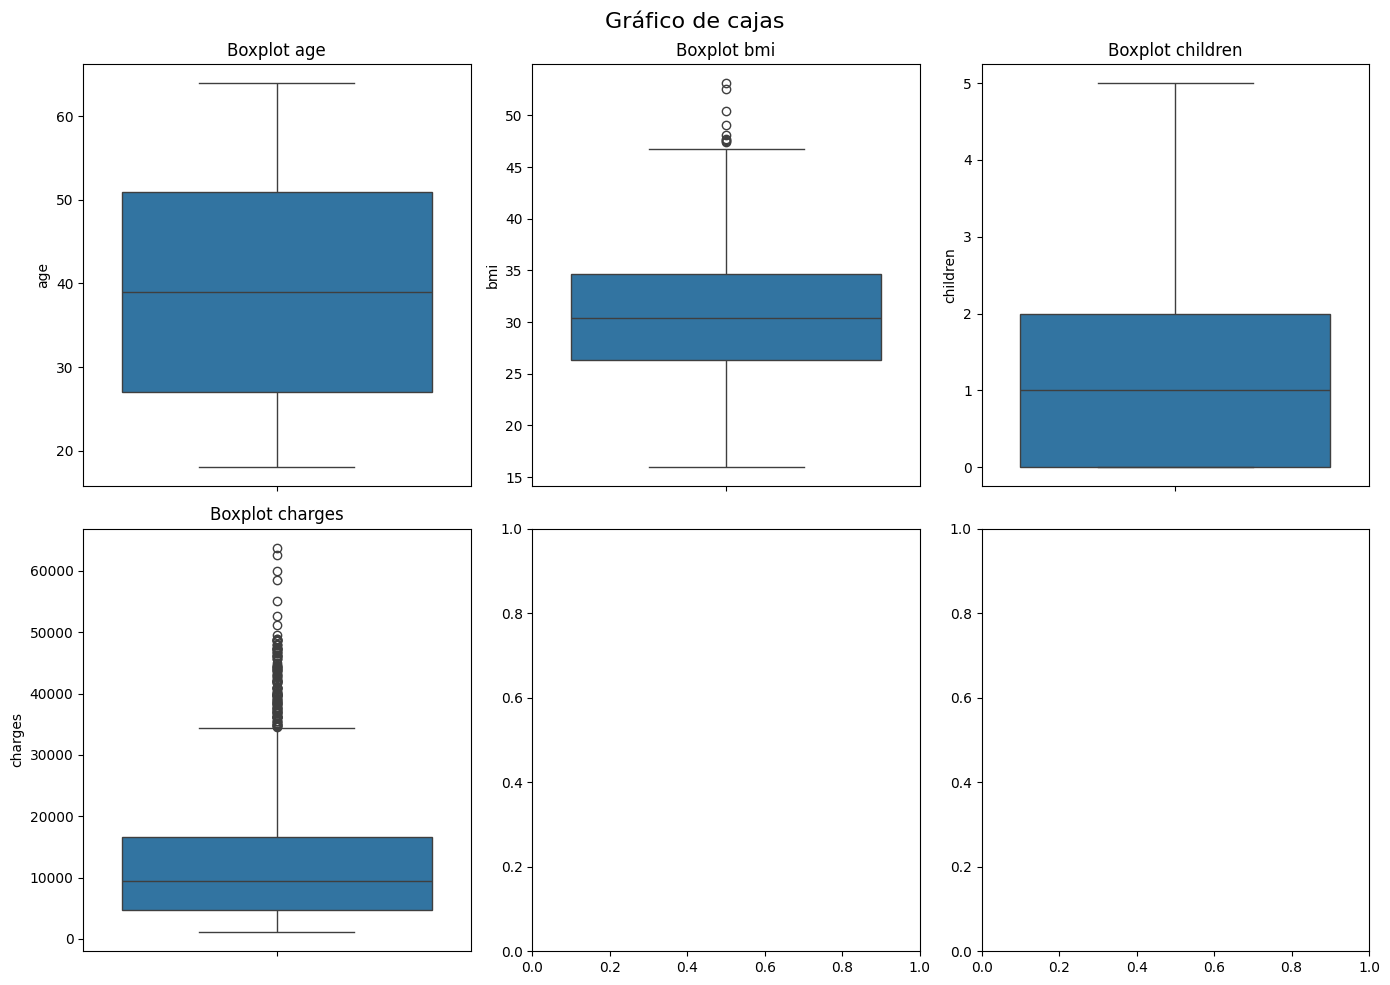

In [8]:
from utils import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df))

Observamos outliers en BMI, los cuales al tratarse de casos extremos se entienden que se encuentren muy fuera de lo normal, también observamos outliers en los costos.

Ahora visualizaremos los histogramas de las diferentes columnas numéricas para entender mejor la distribución

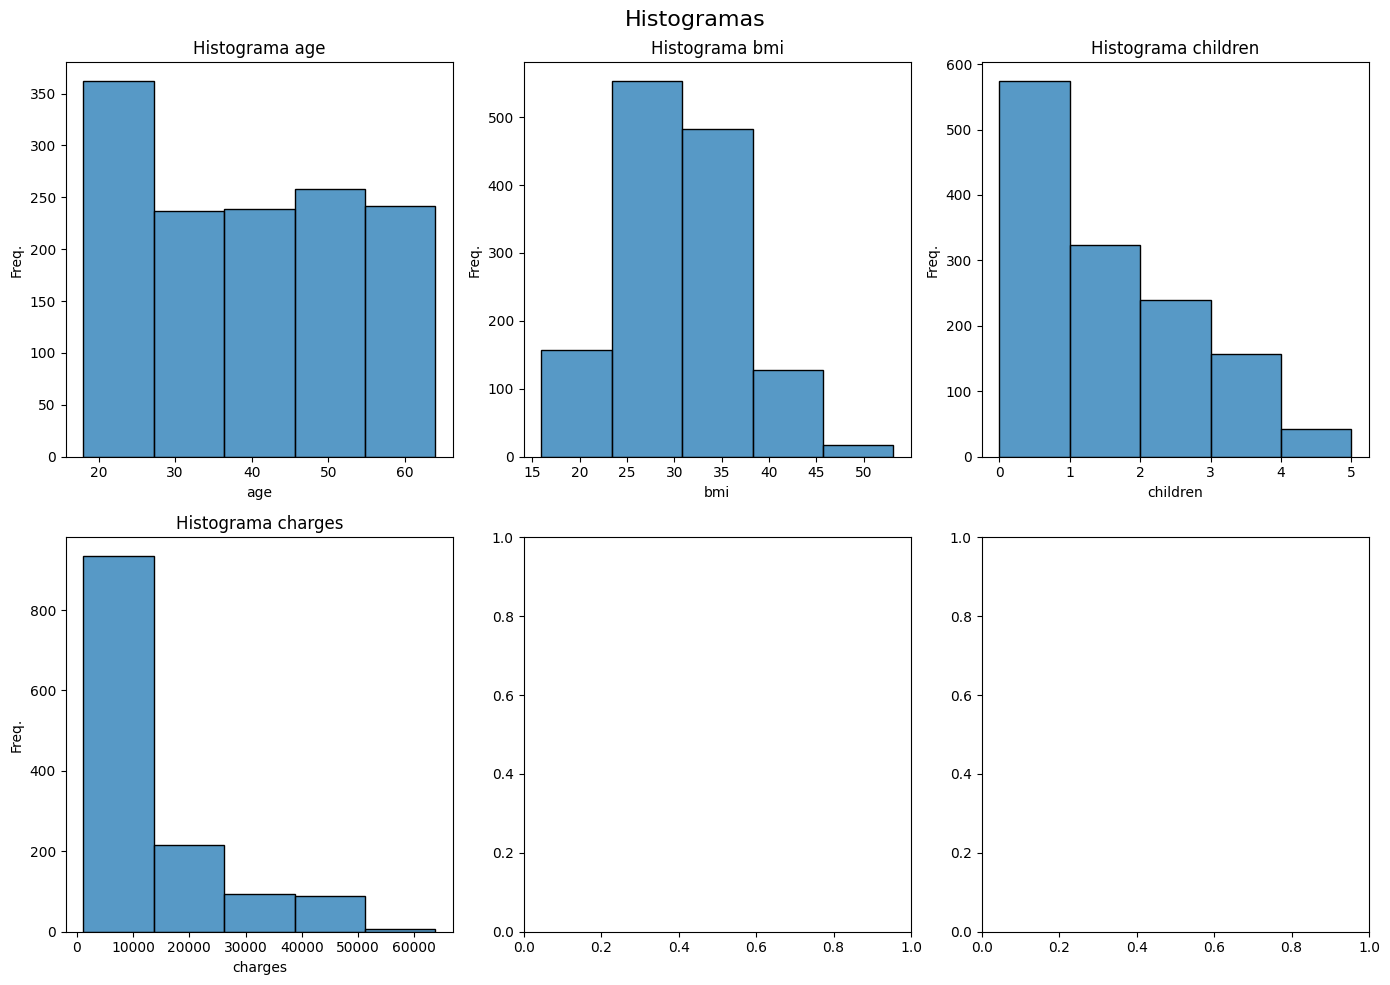

In [9]:
from utils import graph_histogram
graph_histogram(df, get_numeric_columns(df))

La distribuciones no aparentan ser normales

Veremos las correlaciones entre las caracteristicas

In [10]:
from utils import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Ahora graficamos el mapa de calor de las correlaciones

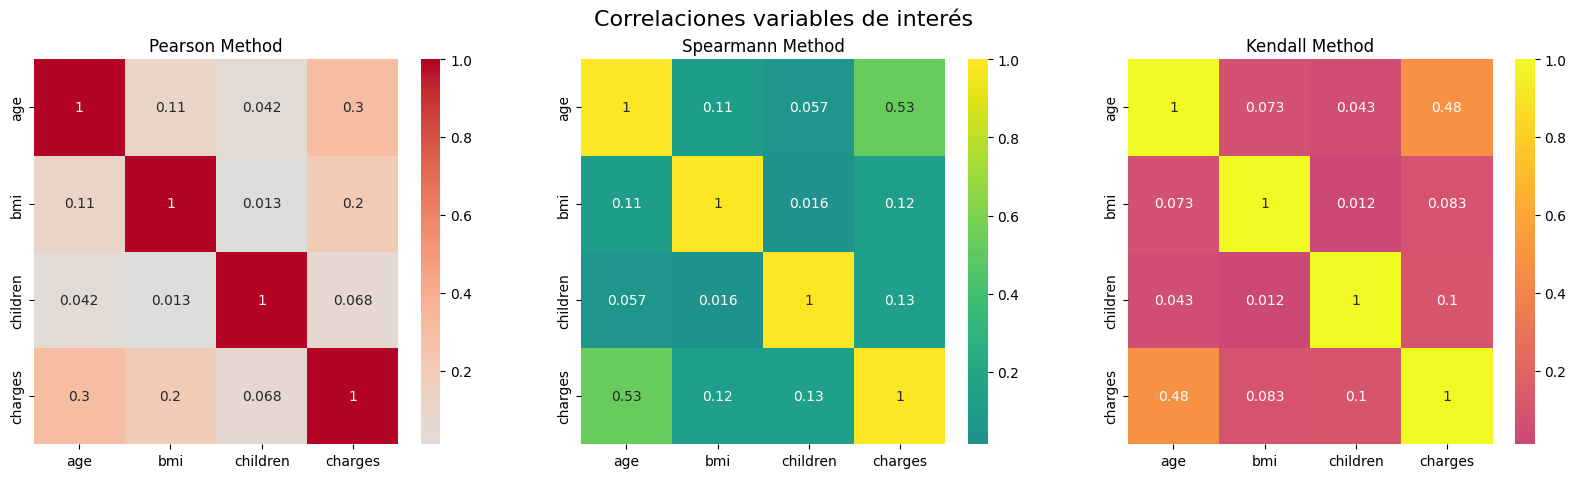

In [11]:
from utils import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,5))

En este caso no existen valores imputables ya que se observa que no existen outliers que sean producto de errores ni valores nulos.

Iniciamos la preparación de datos

Creamos una columna categórica para los costos

In [12]:
min_charges = df["charges"].min()
max_charges = df["charges"].max()

print(f"Min: {min_charges}")
print(f"Max: {max_charges}")

Min: 1121.8739
Max: 63770.42801


In [13]:
from utils import charges_2_cat
df["charges_range"] = df["charges"].apply(charges_2_cat)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   charges_range  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [15]:
df['smoker'] = df['smoker'] == 'yes'
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_range
0,19,female,27.900,0,True,southwest,16884.92400,10.000-20.000
1,18,male,33.770,1,False,southeast,1725.55230,0-10.000
2,28,male,33.000,3,False,southeast,4449.46200,0-10.000
3,33,male,22.705,0,False,northwest,21984.47061,20.000-30.000
4,32,male,28.880,0,False,northwest,3866.85520,0-10.000


In [16]:
predict_numeric = [
    'age',
    'bmi',
    'children',
]

predict_categoric = [
    "sex",
    "region"
]

predict_boolean = [
    "smoker"
]

output = "charges_range"


X = df[[*predict_numeric] + [*predict_categoric] + [*predict_boolean]]
y = df[output]

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, predict_numeric + predict_boolean),
    ("cat", categorical_transformer, predict_categoric)
])

Dividimos el dataset en 70% para entrenamiento, 30% para pruebas

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
    stratify=df[[*predict_categoric]]
)

## Creamos y entrenamos los modelos

### K-Nearest Neighbours

Entrenamos el modelo knn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', knn)
    ]
)

pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model', KNeighborsClassifier())])

### Árbol de decisiones

Realizamos las pruebas con diferentes parámetros

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', dt)
    ]
)

pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

### Regresión Logística

Creamos el modelo y entrenamos

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=100,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42, # Semilla para la reproducibilidad
)

pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', lr)
    ]
)

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model', LogisticRegression(random_state=42))])

## Evaluamos los modelos

## Implementamos Grid Search

### KNN

In [22]:
from sklearn.model_selection import GridSearchCV
pipeline_knn_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            KNeighborsClassifier(),
            param_grid={
                'n_neighbors': list(range(1, 101)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)
pipeline_knn_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................

/home/benja/.pyenv/versions/3.12.3/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]},
                              verbose=2))])

In [23]:
params = pipeline_knn_gscv.steps[-1][1].best_params_

params

{'n_neighbors': 33}

In [25]:
from sklearn.model_selection import cross_val_score
score_knn_gscv = cross_val_score(pipeline_knn_gscv, X_train, y_train, cv=5).mean()



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................

In [26]:
print(f"Promedio score KNN GridSearchCv: {score_knn_gscv}")

Promedio score KNN GridSearchCv: 0.8226646945044942


### Decision Tree

In [27]:
pipeline_dt_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            DecisionTreeClassifier(),
            param_grid={
                'max_depth': list(range(1, 20)) + [None],
                'min_samples_split': list(range(2, 11)),
                'min_samples_leaf': list(range(1, 5)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)
pipeline_dt_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        None],
                                          'min_samples_leaf': [1, 2, 3, 4],
                                          'min_samples_split': [2, 3, 4, 5, 6,
                                                                7, 8, 9, 10]},
                              verbose=2))])

In [28]:
params = pipeline_dt_gscv.steps[-1][1].best_params_

params

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [29]:
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
score_dt_gscv = cross_val_score(pipeline_dt_gscv, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_

In [30]:
print(f"Promedio score dt GridSearchCv: {score_dt_gscv}")

Promedio score dt GridSearchCv: 0.8653885538741608


### Regresión Logística

In [31]:
from time import time
from sklearn.model_selection import GridSearchCV
pipeline_lr_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            LogisticRegression(
                max_iter=10000,            # Número máximo de iteraciones
                tol=1e-4,                # Tolerancia para el criterio de parada
                random_state=42 # Semilla para la reproducibilidad
            ),
            param_grid={
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)
pipeline_lr_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, sol

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=10000,
                                                           random_state=42),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000],
                                          'solver': ['newton-cg', 'lbfgs',
                                                     'liblinear', 'sag',
                                                     'saga']},
                              verbose=2))])

In [32]:
params = pipeline_lr_gscv.steps[-1][1].best_params_

params

{'C': 1000, 'solver': 'lbfgs'}

In [33]:
score_lr_gscv = cross_val_score(pipeline_lr_gscv, X_train, y_train, cv=5).mean()
print(f"Promedio score Regresión Logística GridSearchCv: {score_lr_gscv}")

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, sol

## Implementamos Randomized Search

### KNN

In [34]:
from sklearn.model_selection import RandomizedSearchCV
pipeline_knn_rscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomizedSearchCV(
            KNeighborsClassifier(),
            param_distributions={
                'n_neighbors': list(range(1, 101)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

inicio = time()


pipeline_knn_rscv.fit(X_train, y_train)

fin = time()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.1s
[CV] END .....................................n_neighbors=79; total time=   0.1s
[CV] END .....................................n_neighbors=79; total time=   0.0s
[CV] END .....................................n_neighbors=79; total time=   0.0s
[CV] END .....................................n_neighbors=79; total time=   0.0s
[CV] END .....................................n_neighbors=79; total time=   0.0s
[CV] END ......................................n_neighbors=9; total time=   0.0s
[CV] END ......................................n

In [35]:
params = pipeline_knn_rscv.steps[-1][1].best_params_

params

{'n_neighbors': 53}

In [36]:

score_knn_rscv = cross_val_score(pipeline_knn_rscv, X_train, y_train, cv=5).mean()

print(f"Promedio score KNN RandomSearchCv: {score_knn_rscv}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................................n_neighbors=29; total time=   0.0s
[CV] END .....................................n_neighbors=29; total time=   0.0s
[CV] END .....................................n_neighbors=29; total time=   0.0s
[CV] END .....................................n_neighbors=29; total time=   0.0s
[CV] END .....................................n_neighbors=29; total time=   0.0s
[CV] END .....................................n_neighbors=96; total time=   0.0s
[CV] END .....................................n_neighbors=96; total time=   0.0s
[CV] END .....................................n_neighbors=96; total time=   0.0s
[CV] END .....................................n_neighbors=96; total time=   0.0s
[CV] END .....................................n_neighbors=96; total time=   0.0s
[CV] END .....................................n_neighbors=72; total time=   0.0s
[CV] END .....................................n_

### Árbol de decisión

In [37]:
pipeline_dt_rscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomizedSearchCV(
            DecisionTreeClassifier(),
            param_distributions={
                'max_depth': list(range(1, 20)) + [None],
                'min_samples_split': list(range(2, 11)),
                'min_samples_leaf': list(range(1, 5)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)
pipeline_dt_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=14, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=14, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=14, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=14, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=14, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=14, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=14, min

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model',
                 RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                                    param_distributions={'max_depth': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19,
                                                                       None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10]},
                                    verbose=2))])

In [38]:
params = pipeline_dt_rscv.steps[-1][1].best_params_

params

{'min_samples_split': 9, 'min_samples_leaf': 4, 'max_depth': 19}

In [ ]:

score_dt_rscv = cross_val_score(pipeline_dt_rscv, X_train, y_train, cv=5).mean()



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=9; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=9; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=9; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=9; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=9; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_lea

In [40]:
print(f"Promedio score DT RandomSearchCv: {score_dt_rscv}")

Promedio score DT RandomSearchCv: 0.854699055637729


### Logistic Regression

In [41]:
pipeline_lr_rscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomizedSearchCV(
            LogisticRegression(
                max_iter=10000,            # Número máximo de iteraciones
                tol=1e-4,                # Tolerancia para el criterio de parada
                random_state=42 # Semilla para la reproducibilidad
            ),
            param_distributions={
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            },
            n_iter=35,
            scoring='accuracy',
            cv=5,
            n_jobs=-1,
            random_state=42,
            refit=True,
            verbose=2,
        )),
    ]
)
pipeline_lr_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ...................

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model',
                 RandomizedSearchCV(cv=5,
                                    estimator=LogisticRegression(max_iter=10000,
                                                                 random_state=42),
                                    n_iter=35, n_jobs=-1,
                                    param_distributions={'C': [0.001, 0.01, 0.1,
                                                               1, 10, 100,
                                                               1000],
                                                         'solver': ['newton-cg',
                                                                    'lbfgs',
                                                                    'liblinear',
                                                                    'sag',
                                                                    'saga']},
                                    random_state=42, scoring='accuracy',
                                    verbose=2))])

In [42]:
params = pipeline_lr_rscv.steps[-1][1].best_params_

params

{'solver': 'lbfgs', 'C': 1000}

In [43]:
score_lr_rscv = cross_val_score(pipeline_lr_rscv, X_train, y_train, cv=5).mean()


Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, sol

In [44]:

print(f"Promedio score dt RandomSearchCv: {score_lr_rscv}")

Promedio score dt RandomSearchCv: 0.8194333826373879


Evaluamos los modelos

In [45]:
pipeline_lr_rscv.fit(X_train, y_train)
pipeline_knn_rscv.fit(X_train, y_train)
pipeline_dt_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001,

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model',
                 RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                                    param_distributions={'max_depth': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19,
                                                                       None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10]},
                                    verbose=2))])

In [46]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
print("\nKNN\n")
y_pred_knn_rscv = pipeline_knn_rscv.predict(X_test)
accuracy_knn_rscv = accuracy_score(y_test, y_pred_knn_rscv)
print(f'Exactitud: {accuracy_knn_rscv}')
classification_report_knn_rscv = classification_report(y_test, y_pred_knn_rscv)
print('Informe de Clasificación:')
print(classification_report_knn_rscv)
conf_matrix_knn_rscv = confusion_matrix(y_test, y_pred_knn_rscv)
print('Matriz de Confusión KNN:')
print(conf_matrix_knn_rscv)



print("\n\nÁrbol de decisiones\n")
y_pred_dt_rscv = pipeline_dt_rscv.predict(X_test)
accuracy_dt_rscv = accuracy_score(y_test, y_pred_dt_rscv)
print(f'Exactitud: {accuracy_dt_rscv}')
classification_report_dt_rscv = classification_report(y_test, y_pred_dt_rscv)
print('Informe de Clasificación:')
print(classification_report_dt_rscv)
conf_matrix_dt_rscv = confusion_matrix(y_test, y_pred_dt_rscv)
print('Matriz de Confusión Árbol de Decisión:')
print(conf_matrix_dt_rscv)
Exactitud: 0.8855721393034826


print("\n\nRegresión Logística\n")
y_pred_lr_rscv = pipeline_lr_rscv.predict(X_test)
accuracy_lr_rscv = accuracy_score(y_test, y_pred_lr_rscv)
print(f'Exactitud: {accuracy_lr_rscv}')
classification_report_lr_rscv = classification_report(y_test, y_pred_lr_rscv)
print('Informe de Clasificación:')
print(classification_report_lr_rscv)
conf_matrix_lr_rscv = confusion_matrix(y_test, y_pred_lr_rscv)
print('Matriz de Confusión Regresión Logística:')
print(conf_matrix_lr_rscv)




KNN

Exactitud: 0.8482587064676617
Informe de Clasificación:
               precision    recall  f1-score   support

     0-10.000       0.85      0.99      0.92       219
10.000-20.000       0.84      0.73      0.78       114
20.000-30.000       0.85      0.47      0.61        36
30.000-40.000       0.84      0.70      0.76        23
40.000-50.000       0.82      0.90      0.86        10

     accuracy                           0.85       402
    macro avg       0.84      0.76      0.78       402
 weighted avg       0.85      0.85      0.84       402

Matriz de Confusión KNN:
[[216   3   0   0   0]
 [ 28  83   2   1   0]
 [  8   9  17   1   1]
 [  1   4   1  16   1]
 [  0   0   0   1   9]]


Árbol de decisiones

Exactitud: 0.8507462686567164
Informe de Clasificación:
               precision    recall  f1-score   support

     0-10.000       0.90      0.92      0.91       219
10.000-20.000       0.81      0.88      0.84       114
20.000-30.000       0.68      0.47      0.56        36

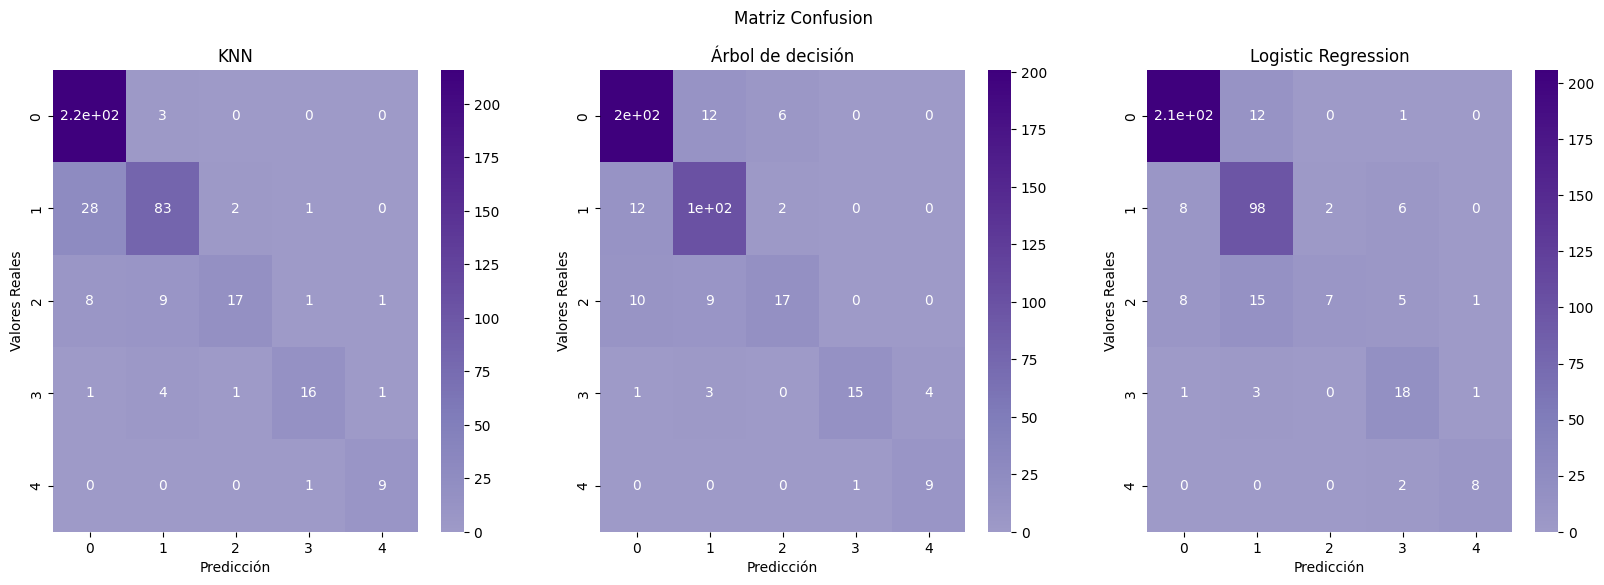

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
ax1, ax2, ax3 = axes.flatten()
sns.heatmap(
    conf_matrix_knn_rscv,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)
sns.heatmap(
    conf_matrix_dt_rscv,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax2,
)
sns.heatmap(
    conf_matrix_lr_rscv,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax3,
)
ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
ax1.set_title('KNN')
ax2.set_xlabel("Predicción")
ax2.set_ylabel("Valores Reales")
ax2.set_xticks(ticks=ax2.get_xticks())
ax2.set_yticks(ticks=ax2.get_yticks())
ax2.set_title('Árbol de decisión')
ax3.set_xlabel("Predicción")
ax3.set_ylabel("Valores Reales")
ax3.set_xticks(ticks=ax3.get_xticks())
ax3.set_yticks(ticks=ax3.get_yticks())
ax3.set_title('Logistic Regression')
plt.suptitle('Matriz Confusion')
plt.show()

Observando los 3 resultados podemos decir que el mejor modelo es el árbol de decisión

In [48]:
y_test[2:3]

1215    10.000-20.000
Name: charges_range, dtype: object

In [49]:
y_pred_dt_rscv[0:1]

array(['30.000-40.000'], dtype=object)

Hallamos la curva ROC

In [50]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

fpr = dict()
tpr = dict()
roc_auc = dict()
binarizer = LabelBinarizer()
y_test_binarized = binarizer.fit_transform(y_test)
y_pred_rf_binarized = binarizer.transform(y_pred_dt_rscv)
classes = binarizer.classes_
n_classes = len(classes)
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_rf_binarized.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_rf_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr_grid = np.linspace(0.0, 1.0, 1000)
mean_tpr = np.zeros_like(fpr_grid)
for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i]) 
mean_tpr /= n_classes
fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.91
Macro-averaged One-vs-Rest ROC AUC score:
0.86


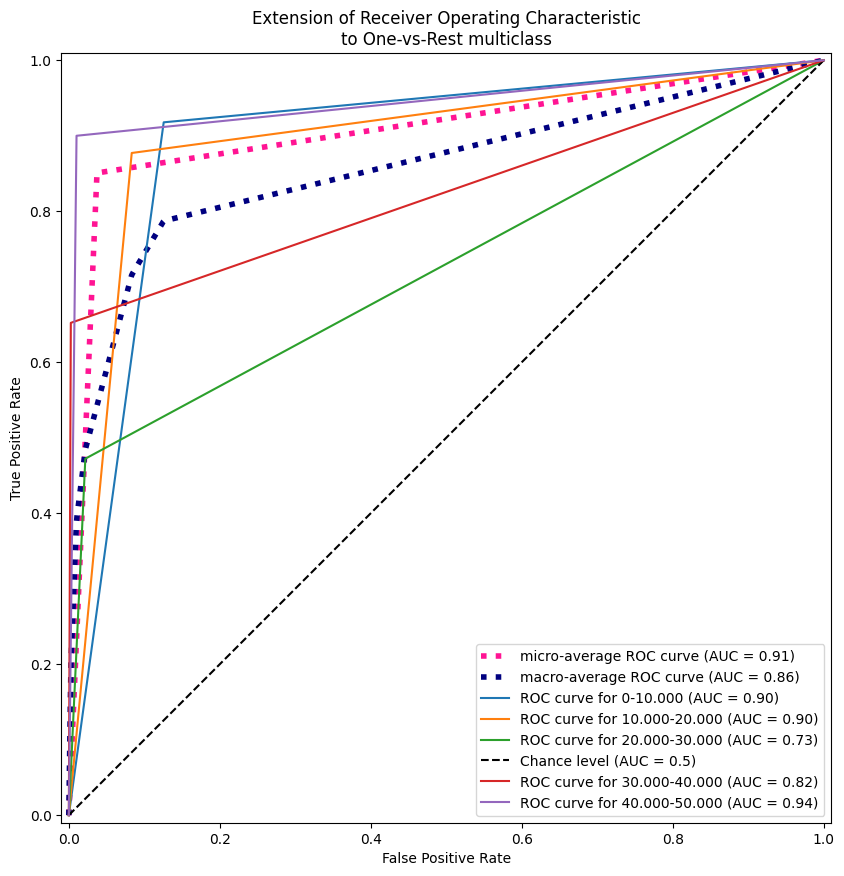

In [51]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for class_id in range(0, n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, class_id],
        y_pred_rf_binarized[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
        plot_chance_level=(class_id == 2),
    )
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

Se observa que el modelo es bastante bueno para distinguir entre clases